# Vibrato Monte Carlo & Automatic differentiation

In [2]:
%reset -f
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
def savefig(filename):
    plt.savefig('outputs/{}.pdf'.format(filename))

In [4]:
# Figures configuration
width = 7
height = width / 1.618

preamble = r"\usepackage[utf8x]{inputenc}, \usepackage[T1]{fontenc}"
plt.rc('pgf', texsystem='pdflatex', preamble=preamble)
plt.rc('figure', figsize=[width, height], autolayout=True)
plt.rc('font', size=13, family='Serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1.2)
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=14, grid=False, titlesize=16, titlepad=22)
plt.rc('axes3d', grid=False)
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('xtick.minor', visible=True, size=4)
plt.rc('ytick.minor', visible=True, size=4)
plt.rc('xtick.major', size=7.5)
plt.rc('ytick.major', size=7.5)


## Vanilla Options under Heston dynamics

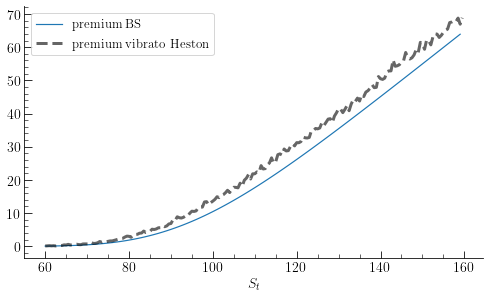

In [6]:
call_vanilla_premium_analytic = pd.read_csv('datasets/call_analytic_premium.csv', 
                                            header=None, names=['$S_t$', 'premium BS'], 
                                            sep=';', index_col=0)
call_heston_premium_vibrato = pd.read_csv('datasets/call_heston_vibrato_premium.csv', 
                                            header=None, names=['$S_t$', 'premium vibrato Heston'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_vanilla_premium_analytic.plot(ax=ax) # Need calibration so that BS and Heston are aligned
call_heston_premium_vibrato.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);

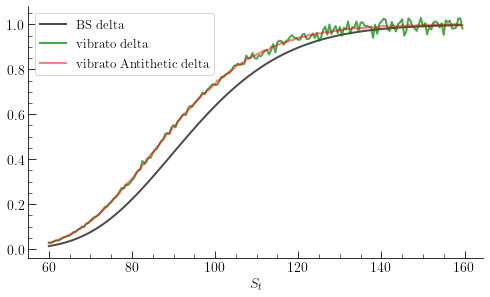

In [12]:
call_vanilla_delta_analytic = pd.read_csv('datasets/call_analytic_delta.csv', 
                                            header=None, names=['$S_t$', 'BS delta'], 
                                            sep=';', index_col=0)
call_heston_delta_vibrato = pd.read_csv('datasets/call_heston_vibrato_delta.csv', 
                                            header=None, names=['$S_t$', 'vibrato delta'], 
                                            sep=';', index_col=0);
call_heston_delta_vibrato_anti = pd.read_csv('datasets/call_heston_vibrato_delta_antithetic.csv', 
                                            header=None, names=['$S_t$', 'vibrato Antithetic delta'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_delta_analytic.plot(ax=ax, color='black', lw=2,alpha=.7)
call_heston_delta_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_heston_delta_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

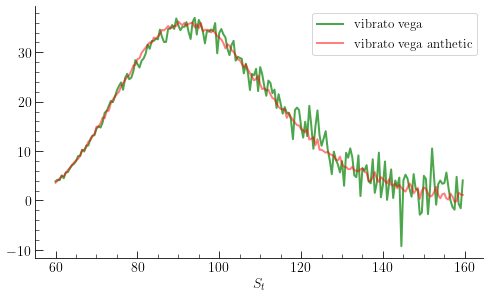

In [13]:
call_heston_vega_vibrato = pd.read_csv('datasets/call_heston_vibrato_vega.csv', 
                                            header=None, names=['$S_t$', 'vibrato vega'], 
                                            sep=';', index_col=0)
call_heston_vega_vibrato_anti = pd.read_csv('datasets/call_heston_vibrato_vega_antithetic.csv', 
                                            header=None, names=['$S_t$', 'vibrato vega anthetic'], 
                                            sep=';', index_col=0)
fig, ax= plt.subplots();
call_heston_vega_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_heston_vega_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

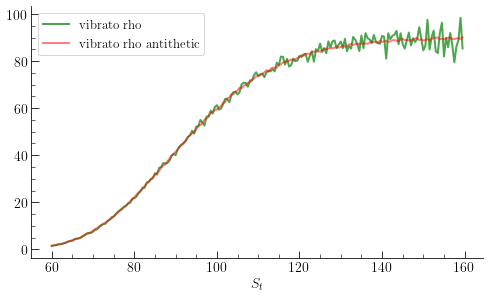

In [14]:
call_heston_rho_vibrato = pd.read_csv('datasets/call_heston_vibrato_rho.csv', 
                                      header=None, 
                                      names=['$S_t$', 'vibrato rho'], 
                                            sep=';', index_col=0)
call_heston_rho_vibrato_anti = pd.read_csv('datasets/call_heston_vibrato_rho_antithetic.csv', 
                                            header=None, names=['$S_t$', 'vibrato rho antithetic'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_heston_rho_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_heston_rho_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);


### Heston automatic differentiation

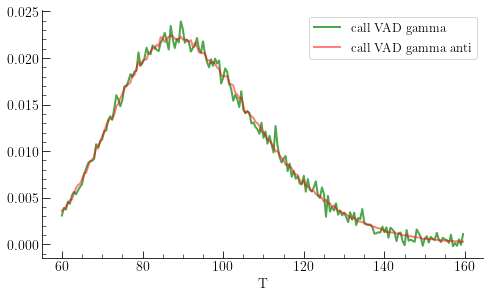

In [19]:
call_vanilla_gamma_analytic = pd.read_csv('datasets/call_analytic_gamma.csv', 
                                            header=None, names=['$S_t$', 'gamma BS'], 
                                            sep=';', index_col=0)
heston_gamma_vibratoad = pd.read_csv('datasets/call_vibratoad_heston_gamma.csv', 
                                            header=None, names=['T', 'call VAD gamma'], 
                                            sep=';', index_col=0)
heston_gamma_vibratoad_anti = pd.read_csv('datasets/call_vibratoad_heston_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call VAD gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
# call_vanilla_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
heston_gamma_vibratoad.plot(ax=ax, color='green', lw=2,alpha=.7);
heston_gamma_vibratoad_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

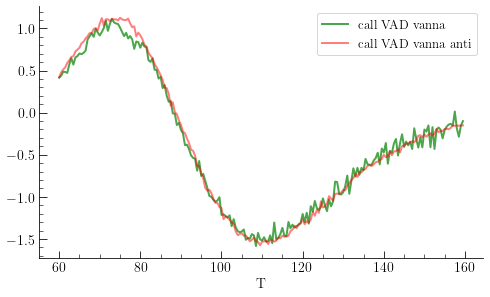

In [18]:
heston_vanna_vibratoad = pd.read_csv('datasets/call_vibratoad_heston_vanna.csv', 
                                            header=None, names=['T', 'call VAD vanna'], 
                                            sep=';', index_col=0)
heston_vanna_vibratoad_anti = pd.read_csv('datasets/call_vibratoad_heston_vanna_antithetic.csv', 
                                            header=None, names=['T', 'call VAD vanna anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
# heston_vanna_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
heston_vanna_vibratoad.plot(ax=ax, color='green', lw=2,alpha=.7);
heston_vanna_vibratoad_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

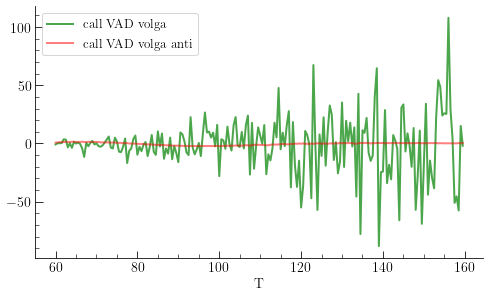

In [20]:
heston_volga_vibratoad = pd.read_csv('datasets/call_vibratoad_heston_volga.csv', 
                                            header=None, names=['T', 'call VAD volga'], 
                                            sep=';', index_col=0)
heston_volga_vibratoad_anti = pd.read_csv('datasets/call_vibratoad_heston_volga_antithetic.csv', 
                                            header=None, names=['T', 'call VAD volga anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
# heston_volga_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
heston_volga_vibratoad.plot(ax=ax, color='green', lw=2,alpha=.7);
heston_volga_vibratoad_anti.plot(ax=ax, color='red', lw=2, alpha=.5);